In [2]:
import pandas as pd
import numpy as np
from custom_detrending import custom_detrending, refine_detrended_flux_err, iteratively_remove_sines

import matplotlib.pyplot as plt
%matplotlib inline

from altaipony.lcio import from_path, from_mast

from copy import deepcopy

from k2sc.standalone import detrend

In [ ]:
flc = from_mast("EPIC 211901458", c=16, mission="K2", mode="TPF")

In [ ]:
flcd.to_fits("EPIC212009190_C18_bigSSO.fits")

In [ ]:
flcd = flc.detrend("k2sc")

In [ ]:
flcd = from_path("EPIC212009190_C18_bigSSO.fits", mission="K2", mode="AltaiPony")

In [22]:
EPIC = 211939015






C = 16
flc = from_path(f"../k2scoc/pony_k2sc_k2_llc_{EPIC}-c{C:02d}_kepler_v2_lc.fits", mode="AltaiPony", mission="K2")

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/lcio.py:139: ResourceWarning: unclosed file <_io.FileIO name='../k2scoc/pony_k2sc_k2_llc_211939015-c16_kepler_v2_lc.fits' mode='rb' closefd=True>
  return _from_path_AltaiPony(path)


In [23]:
flcd = deepcopy(flc)
flcd.flux = flc.detrended_flux

#flcd = flcd[(flcd.time<2281) | (flcd.time>2282)]
#flcd = flcd[(flcd.time<2287) | (flcd.time>2288)]
flcd = flcd[~np.isnan(flcd.flux) & ~np.isnan(flcd.flux_err) & ~np.isnan(flcd.time)]
#flcd = refine_detrended_flux_err(flcd)


In [24]:
flcd = custom_detrending(flcd)

SNR at  0.8701716863236549
SNR at  1.257191153752479
1.257191153752479
1.257191153752479
1.257191153752479
1.2634651013048257
1.2634651013048257
1.3186220602996968
1.3186220602996968
1.3602642139618533
1.3602642139618533
1.3671938307002565
1.3671938307002565
1.3387205200142362
1.3387205200142362
1.3437450917889593
1.3437450917889593
1.342288660238354
1.342288660238354
1.3632782002580601
1.3632782002580601
1.4125482644176153
SNR at  0.756580789543502
SNR at  1.1577928002434055
1.1577928002434055
1.1577928002434055
1.1577928002434055
1.0705233248221593
1.0705233248221593
0.8970405224271475
SNR at  1.7314534462087003
1.7314534462087003
1.7314534462087003
1.7314534462087003
1.780513580269913
1.780513580269913
1.7762595819237375
1.7762595819237375
1.7811020222893759
1.7811020222893759
2.30602090685638
2.30602090685638
2.36686048637721
2.36686048637721
2.341009642939011
2.341009642939011
2.4323996952117963
2.4323996952117963
2.4150959912430983
2.4150959912430983
2.36100564436931


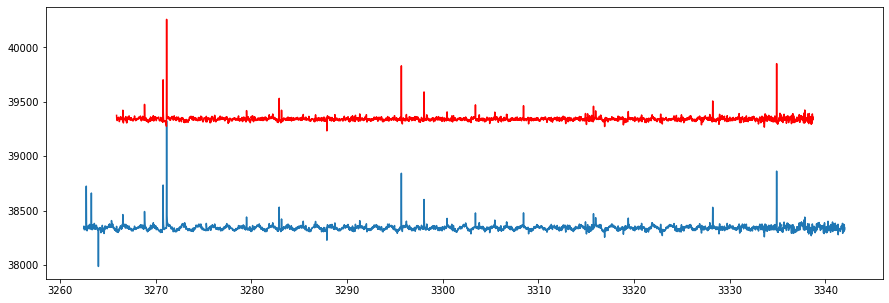

In [27]:
plt.figure(figsize=(15,5))
plt.plot(flc.time, flc.detrended_flux)
#plt.plot(flc.time, flc.flux)
plt.plot(flcd.time, flcd.detrended_flux+1000, c="r");
#plt.plot(flcd.time, flcd.detrended_flux+3*flcd.detrended_flux_err, c="k");
#plt.xlim(3460,3475)
#plt.ylim(23000, 27000)

In [28]:
flcd.detrended_flux_err[:] = np.nanmedian(flcd.detrended_flux_err)

In [9]:
flc = refine_detrended_flux_err(flc)

In [29]:
flares = flcd.find_flares().flares
flares

Found 0 candidate(s) in the (0,719) gap.
Found 0 candidate(s) in the (719,792) gap.
Found 0 candidate(s) in the (792,896) gap.
Found 2 candidate(s) in the (896,3346) gap.


,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,total_n_valid_data_points
0,1854,1857,156494.0,156497.0,3306.670064,3306.73137,5.638057,0.818204,0.001154,3346.0
1,3183,3186,157893.0,157896.0,3335.259035,3335.32034,6.094453,0.806202,0.001427,3346.0


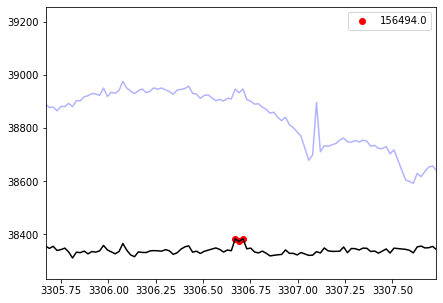

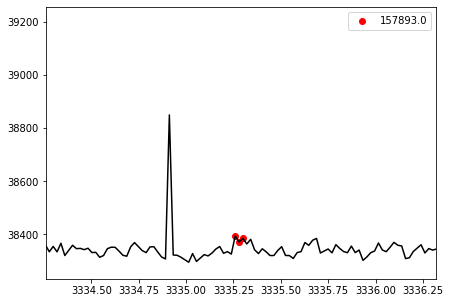

In [30]:
for i, r in flares.iterrows():
    plt.figure(figsize=(7,5))
    plt.plot(flcd.time, flcd.detrended_flux,c="k")
    plt.plot(flc.time, flc.flux,c="b", alpha=.3)
    sta, sto = int(r.istart), int(r.istop)
    plt.scatter(flcd.time[sta:sto], flcd.detrended_flux[sta:sto], c="r", label=r.cstart)#, label=f"EPIC {EPIC}, C{C}")#
    plt.xlim(r.tstart-1,r.tstop+1)
    plt.ylim(np.nanmin(1.*flcd.detrended_flux),1.*np.nanmax(flcd.detrended_flux))
    plt.legend()

In [31]:
with open("../k2scoc/results/tables/lost_periodic_flares.csv", "a") as f:
    flares["C"] = C
    flares["EPIC"] = EPIC
    flares.to_csv(f,index=False, header=False)

In [ ]:
from lightkurve import search_lightcurvefile, search_targetpixelfile

In [ ]:
lcs = search_lightcurvefile("GJ 1151")